In [77]:
import os
from os.path import join
import numpy as np
from gelgenie.segmentation.helper_functions.general_functions import extract_image_names_from_folder
import shutil
import csv
import pandas as pd
import re
import matplotlib.pyplot as plt

In [16]:

common_base = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer'
base_data_folder = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/data/quantitation'
output_folder = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_results'
image_dump = join(output_folder, 'base_data')

data_keys = {
'dynabeads': 'Thermo',
'origami': 'NEB',
'nathan': 'NEB',
'others': 'NEB'
}

# NEB: https://www.neb.com/en-gb/products/n0550-quick-load-purple-1-kb-plus-dna-ladder#Product%20Information
# Thermo: https://www.thermofisher.com/order/catalog/product/10787018?SID=srch-srp-10787018

ladder_masses = {
    'NEB': [40, 40, 48, 40, 32, 120, 40, 57, 45, 122, 34, 31, 27, 23, 124, 49, 37, 32, 61],
    'Thermo':[20, 20, 20, 20, 20, 20, 20, 20, 20, 70, 30, 30, 30, 30, 30, 30, 30, 40]
}

ladder_dict = {}

for unique_id, image in enumerate(extract_image_names_from_folder(base_data_folder,recursive=True)):
    for key,val in data_keys.items():
        if key in image:
            label = '%s_%s.tif' % (unique_id, val)
            ladder_dict[image.split(common_base)[-1]] = label
            shutil.copyfile(image, join(image_dump, label))
            break

with open(join(image_dump, 'name_mappings.csv'), 'w') as f: 
    f.write('Image Name, Mapped Name\n')
    w = csv.writer(f)
    w.writerows(ladder_dict.items())
ladder_dict

{'/data/quantitation/matthew/dynabeads_quad_13:10:23/gelred_1.tif': '0_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_quad_13:10:23/gelred_2.tif': '1_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_quad_13:10:23/gelred_3.tif': '2_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_quad_13:10:23/gelred_4.tif': '3_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_quad_13:10:23/gelred_5.tif': '4_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_quad_13:10:23/sybr_1.tif': '5_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_quad_13:10:23/sybr_2.tif': '6_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_quad_13:10:23/sybr_3.tif': '7_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_quad_13:10:23/sybr_4.tif': '8_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_v4_hulamixer_6-12:10:23/ladder_1.tif': '9_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_v4_hulamixer_6-12:10:23/ladder_2.tif': '10_Thermo.tif',
 '/data/quantitation/matthew/dynabeads_v4_hulamixer_6-12:10:23/

In [47]:
# naming scheme assumes number 1 starts from top left, going down each ladder in turn
data_folder = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_results/quantitation_data/2_thermo'

all_files = os.listdir(data_folder)
all_files.sort(key=lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split(r'(\d+)', s)])
im_name = '2_thermo'
for quantity in [' Raw Volume', ' Local Corrected Volume', ' Global Corrected Volume ']:
    data_dict = {}
    for file in all_files:
        if 'DS_Store' in file:
            continue
        if 'lane' in file:
            data = pd.read_csv(join(data_folder, file))
            data_dict[file.split('.')[0]] = data[quantity]

    df = pd.DataFrame.from_dict(data_dict)     
    df.to_csv('/Users/matt/Desktop/gelgenie_%s_%s.csv' % (im_name, quantity.replace(' ','')),index=False)

df

,lane_1,lane_2,lane_3,lane_4,lane_5,lane_6,lane_7,lane_8,lane_9,lane_10,lane_11,lane_12
0,11569.082240,11112.892945,9814.607855,9994.688029,7837.659084,5231.222604,24177.431884,19714.431884,25475.153455,21089.117847,18188.556625,16811.665745
1,14858.287156,14427.229265,13478.316102,14210.556625,10926.418560,9554.373993,29819.505396,26911.592233,30698.117847,24718.345047,25959.271535,21376.790487
2,15190.235927,14093.411898,15025.848378,13109.995404,11633.235927,7182.565585,27642.498735,19677.411898,24849.338385,19392.988742,22022.126807,20002.652422
3,14651.440844,15649.360669,10765.930851,10971.748218,8454.821731,7790.857338,28750.155753,22856.258211,25914.732596,24037.944175,23291.601193,20611.360669
4,15492.162415,15241.053295,12532.864000,12349.732596,10196.360669,6895.434182,29578.111185,24790.899607,25314.367331,23402.578909,22837.447505,21608.396276
5,16479.745920,16171.425222,13640.710313,11686.623476,10958.258211,7013.645760,30936.402938,26319.534342,30321.169076,27654.037673,26130.008727,25449.643462
6,15600.614516,14302.841716,11682.652422,10198.382953,8556.354007,7185.068916,30317.826095,25786.694691,29664.249251,26309.826095,25751.300480,24568.935215
7,16343.438545,14958.111185,12728.184698,10931.440844,9829.440844,7711.995404,31362.409600,26016.512058,29599.249251,26658.037673,26730.460829,25826.438545
8,15832.044335,14799.191360,12375.264873,12097.710313,9953.498735,7290.915229,30635.563287,27050.803811,30691.066618,27741.249251,26281.008727,25727.512058
9,56087.612218,54865.656785,47036.044335,46653.204684,41076.861702,27472.957498,95496.413964,82145.560989,96546.471855,105622.600960,91266.180102,89752.266938


In [36]:
data[' Global Corrected Volume ']

0     18188.556625
1     25959.271535
2     22022.126807
3     23291.601193
4     22837.447505
5     26130.008727
6     25751.300480
7     26730.460829
8     26281.008727
9     91266.180102
10    39699.701353
11    41650.650124
12    37753.832756
13    31347.329425
14    31635.255913
15    33202.474153
16    27019.685731
17    29841.910633
Name:  Global Corrected Volume , dtype: float64

### GelAnalyzer Conversion

In [46]:
 
key_data = []
update_key = False

inner_list = []


g_file = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_results/gelanalyzer/transient_files/2_thermo.tsv'

with open(g_file, 'r') as f:
    g_data = f.readlines()

for line in g_data:
    if line.startswith('Lane'):
        continue
    if line.startswith('\n'):
        update_key = True
        continue
    if update_key:
        update_key = False
        key_data.append(inner_list)
        inner_list = []
    info = line.split('\t')
    inner_list.append(int(info[3]))
    
key_data.append(inner_list)
final_dict = {}
for index, data in enumerate(key_data):
    final_dict['lane_%s' % (index+1)] = data

df = pd.DataFrame.from_dict(final_dict)   
df.to_csv('/Users/matt/Desktop/ga_results.csv',index=False)


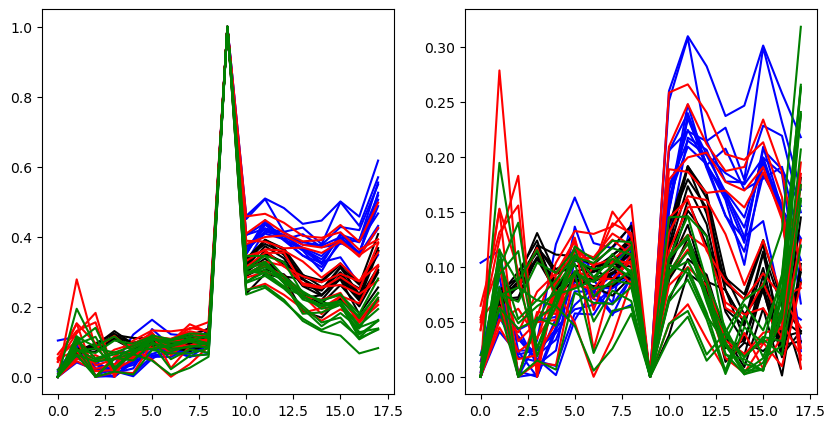

In [94]:
data1 = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_results/quantitation_data/2_thermo/ga_2_thermo_raw.csv'
data2 = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_results/quantitation_data/2_thermo/ga_2_thermo_corrected.csv'
data3 = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_results/quantitation_data/2_thermo/gelgenie_2_thermo_RawVolume.csv'
data4 = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_results/quantitation_data/2_thermo/gelgenie_2_thermo_GlobalCorrectedVolume.csv'

df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)
df3 = pd.read_csv(data3)
df4 = pd.read_csv(data4)

graw = np.array(df1)
gcorr = np.array(df2)
genieraw = np.array(df3)
genieglobal = np.array(df4)

colors = ['b','k','r', 'g']

fig, ax = plt.subplots(1,2,figsize=(10,5))
for index, arr in enumerate([graw, gcorr, genieraw, genieglobal]):
    for col in range(12):
        sel_col = arr[:,col]
        sel_col = (sel_col - sel_col.min())/(sel_col.max()-sel_col.min())
        ax[0].plot(sel_col, c=colors[index])
        ax[1].plot(np.abs(sel_col - ref_vals), c=colors[index])
    

In [88]:
z = np.array(ladder_masses['Thermo'])
ref_vals = (z - z.min())/(z.max()-z.min())

In [89]:
ref_vals

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.4])